**Question1:  
Examine the data types assigned by the 'Pandas' library for each variable in Table 1. Check/assess them with the dataset description provided in Table 1. If there seems to be a mismatch in the data type assigned by the library and the data type as per the description for a variable, correct that data type. Details about the data types that required correction should be included. Finally, attach a screenshot showing the corrected data types of all variables.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing the data file and correcting the data types
df = pd.read_csv('D1.csv')

df['Date'] = pd.to_datetime(df['Date'])

df[['Location', 'WindGustDir', 'WindDir9am', 
    'WindDir3pm', 'Cloud9am', 'Cloud3pm']] = df[['Location', 'WindGustDir', 'WindDir9am', 
                                                 'WindDir3pm', 'Cloud9am', 'Cloud3pm']].astype('category')

df.replace({'.':np.nan, 'NaN':np.nan,'N/A':np.nan, 'NA':np.nan,'yes':1,'Yes':1,'no':0,'No':0}, inplace=True)

#df['Location'] = df['Location'].astype('category')
#df['WindGustDir'] = df['WindGustDir'].astype('category')
#df['WindDir9am'] = df['WindDir9am'].astype('category')
#df['WindDir3pm'] = df['WindDir3pm'].astype('category')
#df['Cloud9am'] = df['Cloud9am'].astype('category')
#df['Cloud3pm'] = df['Cloud3pm'].astype('category')
#ENSO_map = {'.':np.nan, 'yes':1, 'Yes':1, 'No':0}
#df['ENSO'] = df['ENSO'].map(ENSO_map)
#bin_map = {'Yes':1, 'No':0}
#df['RainLastWeek'] = df['RainLastWeek'].map(bin_map)
#df['RainToday'] = df['RainToday'].map(bin_map)
#df['RainTomorrow'] = df['RainTomorrow'].map(bin_map)

df.info()

N:\Programs\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145490 entries, 0 to 145489
Data columns (total 27 columns):
Date             145490 non-null datetime64[ns]
Day              145490 non-null int64
Month            145490 non-null int64
Location         145490 non-null category
MinTemp          144005 non-null float64
MaxTemp          144229 non-null float64
Rainfall         142228 non-null float64
Evaporation      82670 non-null float64
Sunshine         75625 non-null float64
WindGustDir      135163 non-null category
WindGustSpeed    135226 non-null float64
WindDir9am       134922 non-null category
WindDir3pm       141262 non-null category
WindSpeed9am     143722 non-null float64
WindSpeed3pm     142428 non-null float64
Humidity9am      142836 non-null float64
Humidity3pm      140983 non-null float64
Pressure9am      130425 non-null float64
Pressure3pm      130462 non-null float64
Cloud9am         89582 non-null category
Cloud3pm         86114 non-null category
Temp9am          143723

**Question 2: Using suitable statistical measures and functions  
 1)Identify and report the variables with skewness. Show the detail.**

N:\Programs\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3296: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000259217B7400>,
      dtype=object)

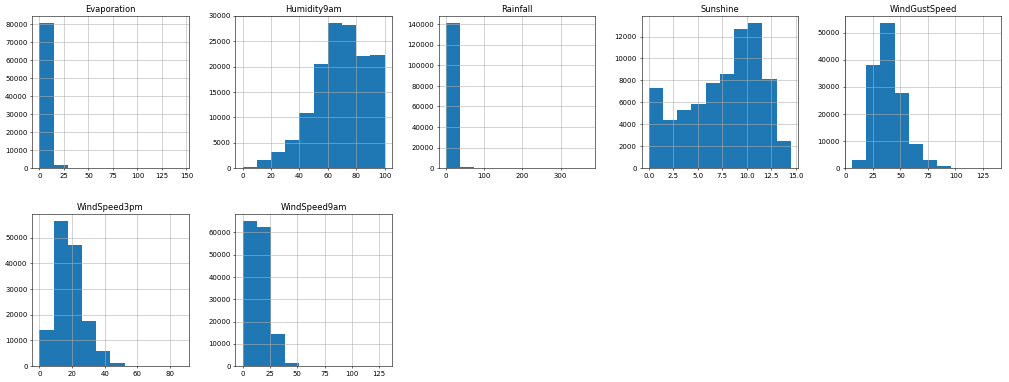

In [3]:
#Plotting histograms of the variables identified to show visible skewness
df_skew = df[['Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am']]
fig, ax = plt.subplots(figsize=(25,25), dpi=50)
df_skew.hist(ax=ax, layout=(5,5))

**Question 2:  
2) There may be inconsistencies or errors in the data. List the errors identified and detail how you have identified them.**

In [4]:
#listing the intial inconsistencies in the ENSO values
df2 = pd.read_csv('D1.csv')

df2['ENSO'].unique()

array([nan, 'Yes', '.', 'No', 'yes'], dtype=object)

In [5]:
#displaying NaN values found in data
df2[['Location','Humidity9am', 'Humidity3pm', 'Sunshine', 'RainToday', 
    'RainTomorrow', 'Cloud9am', 'Cloud3pm', 'Rainfall', 'MaxTemp', 
    'MinTemp']].sort_values(by = ['Humidity9am'], ascending = True).head(10)

,Location,Humidity9am,Humidity3pm,Sunshine,RainToday,RainTomorrow,Cloud9am,Cloud3pm,Rainfall,MaxTemp,MinTemp
107256,Woomera,0.0,0.0,11.2,No,No,1.0,1.0,0.0,40.0,19.4
137782,AliceSprings,1.0,1.0,12.0,No,No,0.0,0.0,0.0,36.3,10.1
112801,Witchcliffe,1.0,1.0,NaN,Yes,No,NaN,NaN,9.8,19.1,14.6
112810,Witchcliffe,1.0,1.0,NaN,Yes,No,NaN,NaN,1.4,23.1,13.3
137783,AliceSprings,1.0,4.0,11.9,No,No,0.0,0.0,0.0,39.0,12.3
137797,AliceSprings,1.0,2.0,12.3,No,No,1.0,1.0,0.0,41.1,20.9
105846,Woomera,2.0,3.0,8.0,No,No,1.0,6.0,0.0,37.2,19.6
136404,AliceSprings,2.0,2.0,10.2,No,No,1.0,1.0,0.0,35.2,21.5
136415,AliceSprings,2.0,2.0,11.8,No,No,1.0,1.0,0.0,37.1,23.2
107274,Woomera,2.0,10.0,NaN,No,No,4.0,8.0,0.0,36.4,19.6


In [6]:
#displaying invalid cloud cover values
df2[['Cloud9am','Cloud3pm']].describe()

,Cloud9am,Cloud3pm
count,89582.000000,86114.000000
mean,4.447646,4.509859
std,2.887218,2.720443
min,0.000000,0.000000
25%,1.000000,2.000000
50%,5.000000,5.000000
75%,7.000000,7.000000
max,9.000000,9.000000


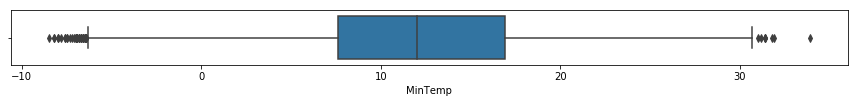

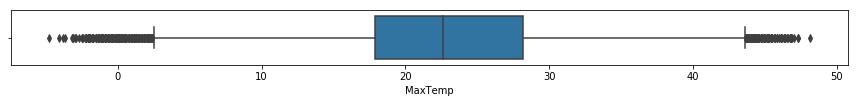

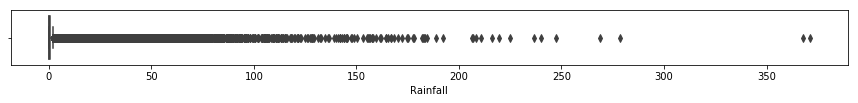

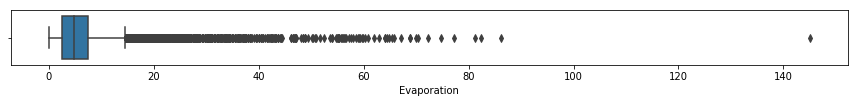

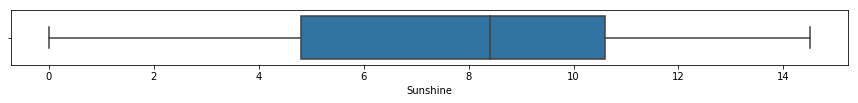

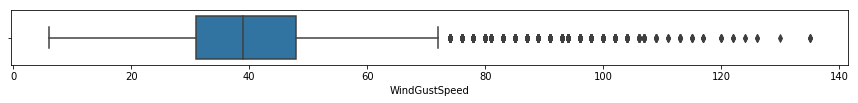

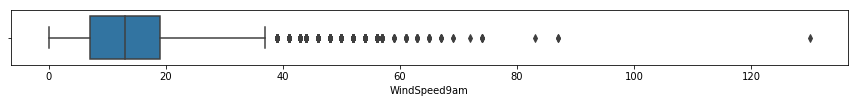

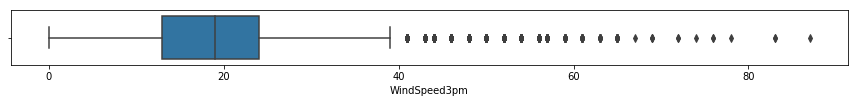

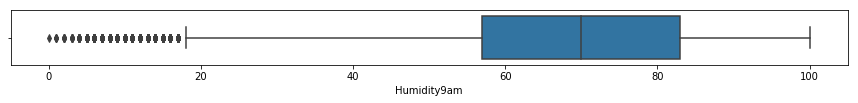

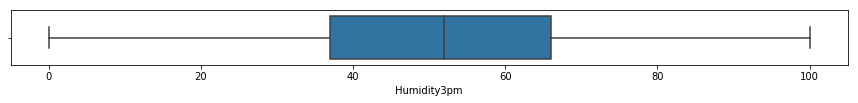

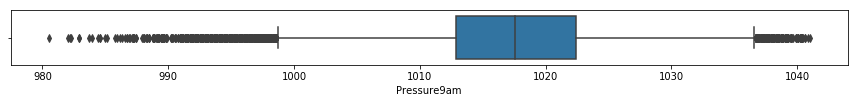

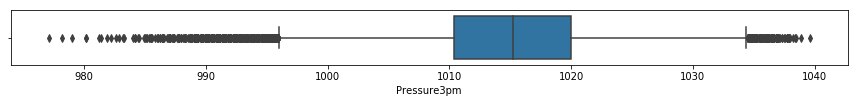

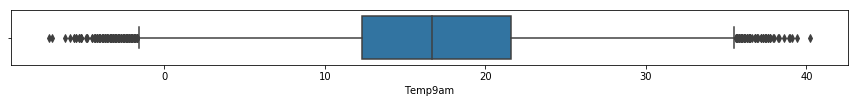

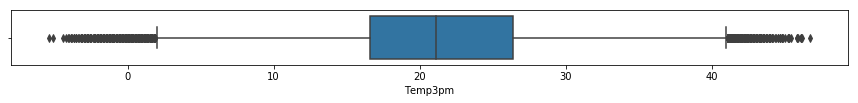

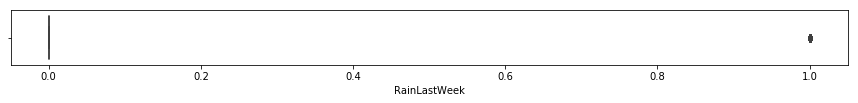

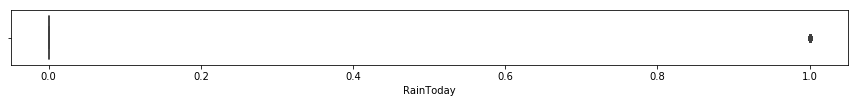

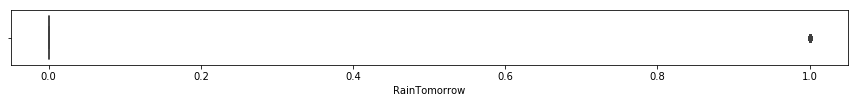

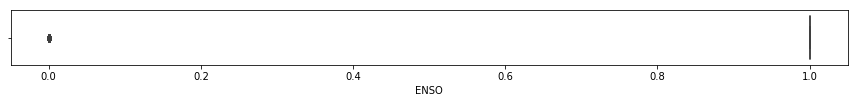

In [7]:
#displaying box and wisker plots for all float64 type variables
import warnings
warnings.filterwarnings("ignore")

df_nums = df.select_dtypes(include='float64')
df_nums = list(df_nums.columns.values)
def boxplots(var, name):
    fig = plt.figure(figsize=(15,1))
    box = sns.boxplot(var)
    plt.show()
for n in df_nums:
    boxplots(df[n],n)

**Question 2:  
3) Summarise your findings (e.g., noise and data quality problem in the data, patterns that you may have observed, etc) during this data exploration process.**

In [ ]:
#no new code used

**Question 2: 4) Answer the followings:  
a. Give the details (location and month) of the longest day (the day which had the most sunshine) recorded in this dataset.**

In [8]:
#displaying the month, location and sunshine of the longest day
df[['Month', 'Location', 'Sunshine']].sort_values(by = ['Sunshine'], ascending = False).head(1)

,Month,Location,Sunshine
72886,12,Mildura,14.5


**Question 2: 4)  
b.What was the average maximum temperature recorded in 2016 in Uluru when the sudden burst in wind speed was in the Southerly direction?**

In [9]:
#displaying the maximum temperature recorded in Uluru in 2016 during a sudden burst in wind speed in the Southerly direction
Uluru_df = df[(df['Location'] == 'Uluru') 
              & (df['Date'].dt.year==2016) &((df['WindGustDir'] == 'S'))]

Uluru_df['MaxTemp'].mean()

32.1764705882353

**Question 2: 4)   
c. List the top-5 locations based on the total amount of rainfall recorded in 2017.**

In [10]:
#listinting the top 5 locations based on Rainfall recorded in 2016
df_rain = df[['Location', 'Date', 'Rainfall']]
df_rain[(df['Date'].dt.year == 2017)].groupby('Location').sum().sort_values(by = 'Rainfall', ascending = False).head(5)

,Rainfall
Location,
Darwin,1739.0
CoffsHarbour,1307.8
Cairns,1256.2
Katherine,1133.8
Sydney,865.8


**Question 2: 4)  
d. Give a summary of the wind directions such as the frequency of a particular wind direction when it was a rainy day.**

In [11]:
#Summarising the count of values for each wind direction during rainy and non-rainy days
windct = pd.crosstab(index=df['RainToday'],columns = df['WindGustDir'], margins = True)
wind_graph = windct.iloc[0:2, 0:16]
wind_graph

WindGustDir,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
RainToday,,,,,,,,,,,,,,,,
0.0,7723,6792,6008,7621,6103,5517,5257,6144,6465,7388,6896,6108,6266,6792,5843,6224
1.0,1321,1192,1273,1413,936,900,1272,1846,2447,1894,2074,2474,2511,2954,2201,2647


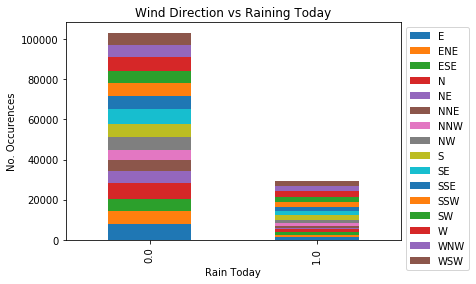

In [12]:
#displaying a stacked bar graph detailing the proportion of values for each wind direction during rainy and non-rainy days
wind_graph.plot.bar(stacked = True)
plt.xlabel("Rain Today")
plt.ylabel("No. Occurences")
plt.title("Wind Direction vs Raining Today")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)

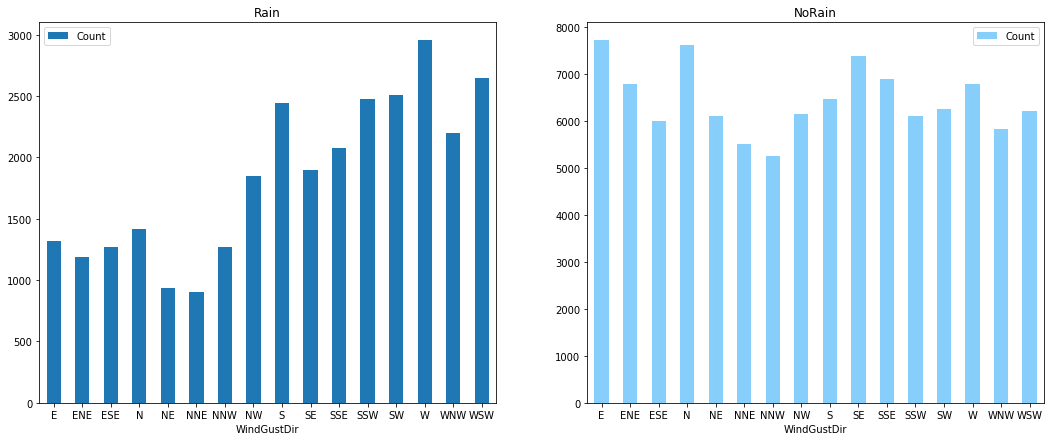

In [13]:
#displaying a side-by-side bar graphs detailing the proportion of values for each wind direction during rainy and non-rainy days
dfrain = df.groupby(['WindGustDir','RainToday']).size().rename('Count').reset_index()
dfrain1=dfrain.query('RainToday == 1')
dfrain0=dfrain.query('RainToday == 0')
fig, axes = plt.subplots(ncols=2,figsize=(18,7))
dfrain1.plot(kind='bar',x='WindGustDir',y='Count',rot=0,title='Rain',ax=axes[0])
dfrain0.plot(kind='bar',x='WindGustDir',y='Count',rot=0,title='NoRain',color='lightskyblue',ax=axes[1])

In [14]:
#showing the relationship between WindGustSpeed, WindSpeed, Max/MinTemp and Sunshine for each wind gust direction value
Wind_df = df[['WindGustDir', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'MaxTemp', 'MinTemp', 'Sunshine']]
Wind_df.groupby('WindGustDir').median().sort_values(by = 'WindGustSpeed', ascending = False).round(2)

,WindGustSpeed,WindSpeed9am,WindSpeed3pm,MaxTemp,MinTemp,Sunshine
WindGustDir,,,,,,
W,43.0,13.0,20.0,19.6,9.8,7.5
WNW,43.0,13.0,20.0,20.4,10.1,7.5
NW,41.0,13.0,19.0,21.1,10.0,7.7
WSW,41.0,13.0,19.0,19.8,10.1,8.1
N,39.0,13.0,19.0,21.7,10.0,7.4
NNW,39.0,13.0,19.0,20.9,9.4,7.6
S,39.0,15.0,19.0,21.7,12.5,7.7
SSE,39.0,15.0,19.0,23.2,13.1,8.4
SSW,39.0,13.0,19.0,21.1,11.7,8.1


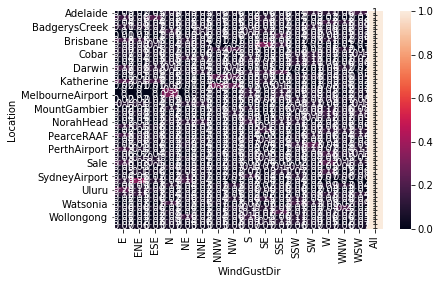

In [15]:
#displaying a two-way table outline the percentage distribution of each wind gust direction by location
test= pd.crosstab(index = df['Location'], columns = df['WindGustDir'], margins = True)
test = test.div(test['All'], axis=0).round(2)
sns.heatmap(test, annot=True)

**Question 3: Using suitable visualisation plots:  
1)Understand the distribution of variables and identify data quality problems.**

Skewness:
 Day              0.01
Month            0.03
MinTemp          0.02
MaxTemp          0.22
Rainfall         9.84
Evaporation      3.76
Sunshine        -0.50
WindGustSpeed    0.87
WindSpeed9am     0.78
WindSpeed3pm     0.63
Humidity9am     -0.48
Humidity3pm      0.03
Pressure9am     -0.10
Pressure3pm     -0.05
Temp9am          0.09
Temp3pm          0.24
RainLastWeek     1.32
RainToday        1.32
RainTomorrow     1.32
ENSO            -5.69
dtype: float64


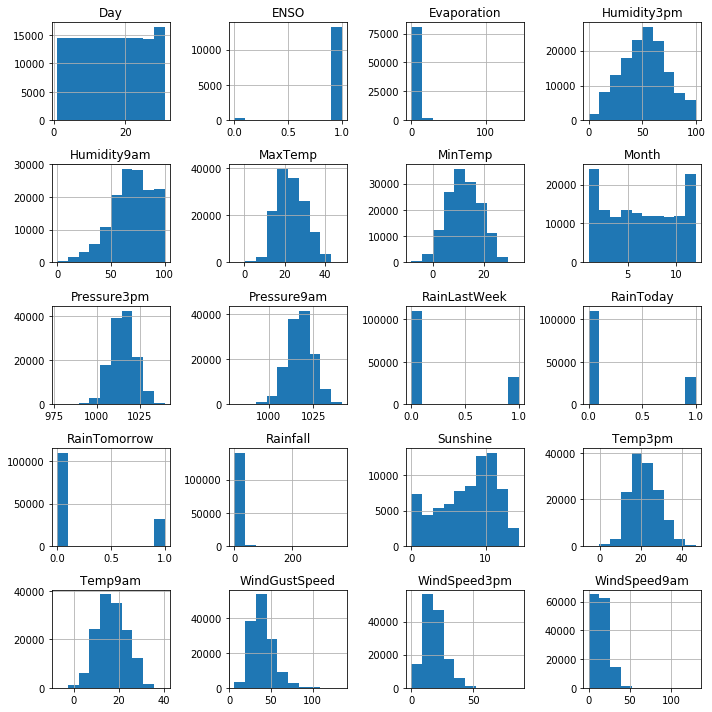

In [16]:
#plotting the skewness of each variable
print("Skewness:\n", round(df.skew(),2))
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10
df.hist();
plt.tight_layout()

In [17]:
#descibing nominal variable statistics relating to distribution/skewness
df.describe()

,Day,Month,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainLastWeek,RainToday,RainTomorrow,ENSO
count,145490.000000,145490.000000,144005.000000,144229.000000,142228.000000,82670.000000,75625.000000,135226.000000,143722.000000,142428.000000,142836.000000,140983.000000,130425.000000,130462.000000,143723.000000,141881.000000,142228.000000,142228.000000,142222.000000,13548.000000
mean,15.712214,6.400564,12.194325,23.222217,2.360812,5.468232,7.611178,40.035829,14.043257,18.662798,68.878119,51.535320,1017.648087,1015.253982,16.991064,21.684221,0.224323,0.224196,0.224185,0.971730
std,8.794761,3.427545,6.398058,7.118832,8.477432,4.193704,3.785483,13.606994,8.915057,8.809496,19.029131,20.797837,7.107156,7.038050,6.488310,6.936503,0.417137,0.417053,0.417046,0.165749
min,1.000000,1.000000,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,-7.200000,-5.400000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,3.000000,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,12.300000,16.600000,0.000000,0.000000,0.000000,1.000000
50%,16.000000,6.000000,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,16.700000,21.100000,0.000000,0.000000,0.000000,1.000000
75%,23.000000,9.000000,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,21.600000,26.400000,0.000000,0.000000,0.000000,1.000000
max,31.000000,12.000000,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,40.200000,46.700000,1.000000,1.000000,1.000000,1.000000


In [18]:
#descibing categorical variable statistics relating to distribution/skewness
df2.describe(include=[np.object])

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainLastWeek,RainToday,RainTomorrow,ENSO
count,145490,145490,135163,134922,141262,142228,142228,142222,13664
unique,3436,49,16,16,16,2,2,2,4
top,7/22/2015,Canberra,W,N,SE,No,No,No,Yes
freq,49,3436,9923,11760,10839,110323,110341,110338,10680


In [19]:
#listing value count for each location
df['Location'].value_counts()

Canberra            3436
Sydney              3344
Brisbane            3193
Perth               3193
Melbourne           3193
Hobart              3193
Darwin              3193
Adelaide            3193
Archerfield         3070
Cairns              3040
Townsville          3040
Wollongong          3040
Bendigo             3040
Ballarat            3040
GoldCoast           3040
Launceston          3040
AliceSprings        3040
Albany              3040
MountGambier        3040
MountGinini         3040
Newcastle           3039
Penrith             3039
Tuggeranong         3039
NorfolkIsland       3009
Sale                3009
Witchcliffe         3009
Williamtown         3009
Watsonia            3009
BadgerysCreek       3009
WaggaWagga          3009
SydneyAirport       3009
Cobar               3009
CoffsHarbour        3009
Dartmoor            3009
Woomera             3009
Richmond            3009
Portland            3009
PerthAirport        3009
MelbourneAirport    3009
Mildura             3009


In [20]:
#checking count of complete data
indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
length = df[indices_to_keep].index
number_of_rows = len(length)
number_of_rows

3697

Date              0.000000
Day               0.000000
Month             0.000000
Location          0.000000
MinTemp           1.020689
MaxTemp           0.866726
Rainfall          2.242078
Evaporation      43.178225
Sunshine         48.020483
WindGustDir       7.098082
WindGustSpeed     7.054780
WindDir9am        7.263729
WindDir3pm        2.906042
WindSpeed9am      1.215204
WindSpeed3pm      2.104612
Humidity9am       1.824180
Humidity3pm       3.097807
Pressure9am      10.354664
Pressure3pm      10.329232
Cloud9am         38.427383
Cloud3pm         40.811052
Temp9am           1.214516
Temp3pm           2.480583
RainLastWeek      2.242078
RainToday         2.242078
RainTomorrow      2.246202
ENSO             90.688020
dtype: float64


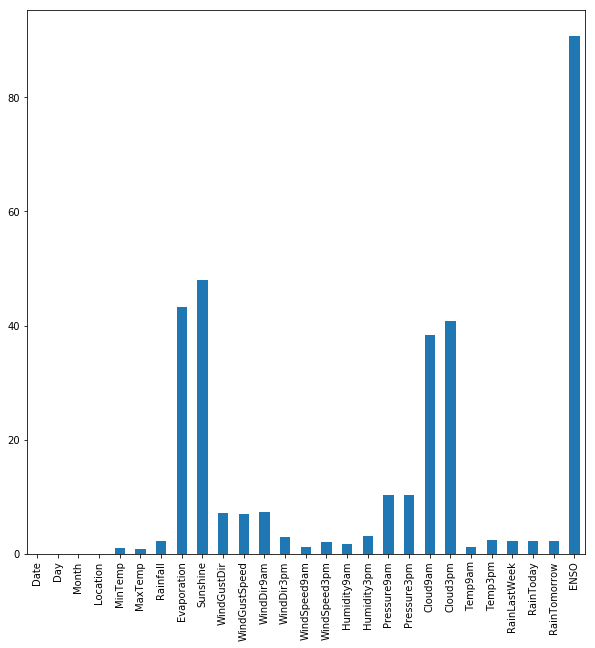

In [21]:
#check percentage null values in dataset by variable
df_nulls = df.isnull().sum()/df.shape[0]*100
print(df_nulls)
df_nulls.plot(kind='bar')

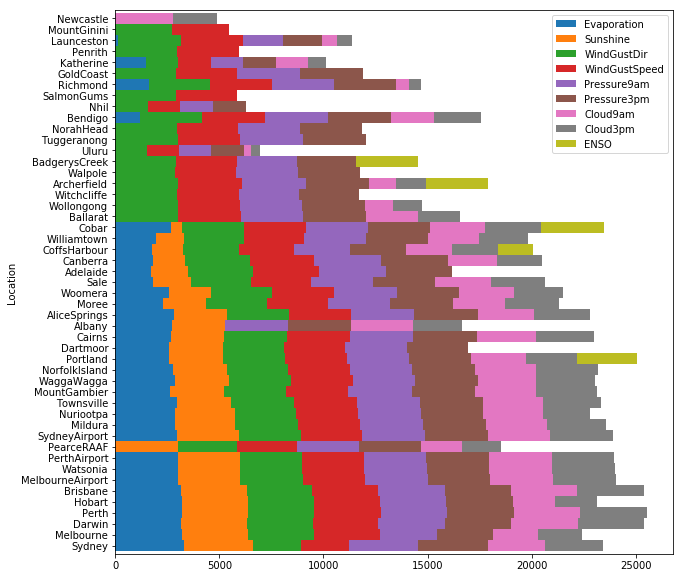

In [22]:
#plot value count of variables by location
datacount = df[['Location','Evaporation','Sunshine','WindGustDir','WindGustSpeed','Pressure9am','Pressure3pm',
                'Cloud9am','Cloud3pm','ENSO']].groupby('Location').count().sort_values(by = ['Sunshine'], ascending=False)
datacount.plot(stacked=True, width=1,kind='barh')

In [23]:
#check temperature difference
df['checkTemp']=(df['MaxTemp']-df['MinTemp']).round(1)
df[['Date', 'Day', 'Month', 'Location', 'MaxTemp','MinTemp','checkTemp']].sort_values(by = ['checkTemp'], ascending=True).head(30)
#df['checkTemp'].value_counts().sort_index().head(10)

,Date,Day,Month,Location,MaxTemp,MinTemp,checkTemp
27880,2010-11-15,15,11,Richmond,22.6,22.6,0.0
34233,2010-11-15,15,11,SydneyAirport,21.7,21.7,0.0
131734,2013-11-07,7,11,Hobart,12.3,12.3,0.0
105410,2016-12-26,26,12,Nuriootpa,21.7,21.7,0.0
102959,2010-01-12,12,1,Nuriootpa,22.6,22.6,0.0
24871,2010-11-15,15,11,Penrith,21.2,21.2,0.0
54873,2016-10-10,10,10,MountGinini,6.5,6.5,0.0
62245,2011-11-30,30,11,Sale,18.4,18.4,0.0
105452,2017-02-06,6,2,Nuriootpa,16.6,16.5,0.1
83784,2016-10-16,16,10,Dartmoor,14.5,14.4,0.1


**Question 3:  
2) Determine if there is any relationship between the variables Humidity3pm and Pressure3pm? How would you handle these two variables in the data modelling if a relationship exists?**

Text(0, 0.5, 'Pressure3pm')

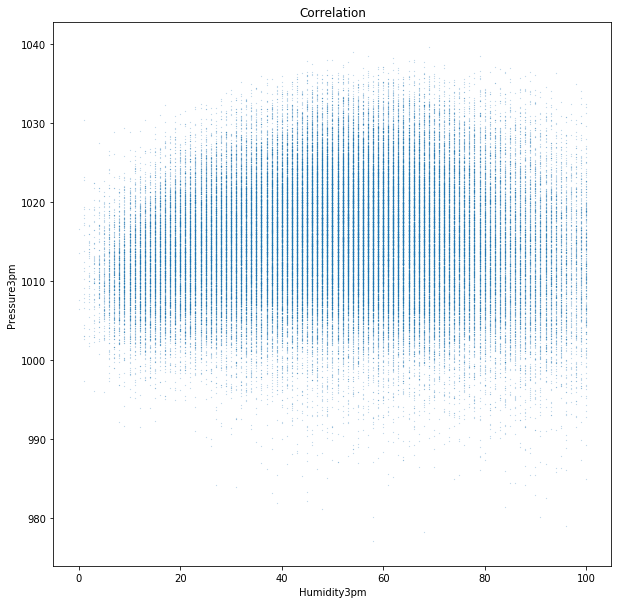

In [24]:
#plot Humidity3pm and Pressure3pm correlation
plt.scatter(df['Humidity3pm'], df['Pressure3pm'], s=0.01)
df['Humidity3pm'].corr(df['Pressure3pm']).round(2)
plt.title('Correlation') 
plt.xlabel('Humidity3pm') 
plt.ylabel('Pressure3pm')

**Question 3:  
3) Identify the highly correlated variable pairs and elaborate on how to treat these variables in the mining process in such a case.**

In [25]:
#display data correlation
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Day,Month,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainLastWeek,RainToday,RainTomorrow,ENSO,checkTemp
Day,1,0.0092,0.0024,0.00064,0.0017,-0.0061,-0.0004,-0.0091,-0.0088,-0.0099,0.015,0.013,-0.021,-0.022,0.00022,-0.00025,0.0033,0.0032,0.0054,0.0034,-0.0024
Month,0.0092,1,-0.2,-0.16,-0.031,-0.027,0.024,0.061,0.051,0.06,-0.091,-0.019,0.035,0.025,-0.14,-0.17,0.011,0.01,0.0073,0.0045,0.028
MinTemp,0.0024,-0.2,1,0.74,0.1,0.47,0.073,0.18,0.18,0.18,-0.23,0.0061,-0.45,-0.46,0.9,0.71,0.056,0.056,0.084,0.051,-0.23
MaxTemp,0.00064,-0.16,0.74,1,-0.075,0.59,0.47,0.068,0.014,0.05,-0.5,-0.51,-0.33,-0.43,0.89,0.98,-0.23,-0.23,-0.16,0.1,0.49
Rainfall,0.0017,-0.031,0.1,-0.075,1,-0.064,-0.23,0.13,0.087,0.058,0.22,0.26,-0.17,-0.13,0.011,-0.08,0.5,0.5,0.24,0.0022,-0.24
Evaporation,-0.0061,-0.027,0.47,0.59,-0.064,1,0.37,0.2,0.19,0.13,-0.5,-0.39,-0.27,-0.29,0.55,0.57,-0.19,-0.19,-0.12,0.069,0.24
Sunshine,-0.0004,0.024,0.073,0.47,-0.23,0.37,1,-0.035,0.0055,0.054,-0.49,-0.63,0.042,-0.02,0.29,0.49,-0.33,-0.33,-0.45,0.0054,0.58
WindGustSpeed,-0.0091,0.061,0.18,0.068,0.13,0.2,-0.035,1,0.61,0.69,-0.22,-0.026,-0.46,-0.41,0.15,0.033,0.16,0.16,0.23,-0.07,-0.13
WindSpeed9am,-0.0088,0.051,0.18,0.014,0.087,0.19,0.0055,0.61,1,0.52,-0.27,-0.032,-0.23,-0.18,0.13,0.0045,0.1,0.1,0.091,-0.09,-0.21
WindSpeed3pm,-0.0099,0.06,0.18,0.05,0.058,0.13,0.054,0.69,0.52,1,-0.15,0.016,-0.3,-0.26,0.16,0.028,0.08,0.081,0.088,-0.088,-0.15


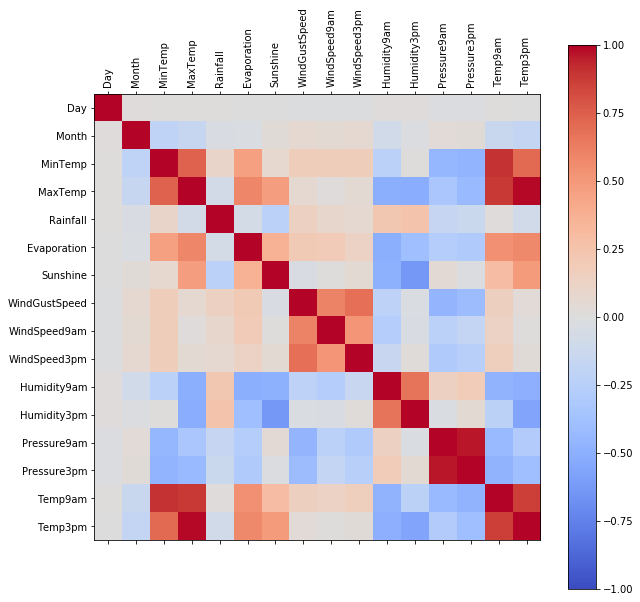

In [26]:
#plot data correlation
dfcorrgraph = df[['Day','Month','MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am',
                  'WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Temp9am',
                  'Temp3pm']]
corr = dfcorrgraph.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1) 
fig.colorbar(cax)
ticks = np.arange(0,len(dfcorrgraph.columns),1) 
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(dfcorrgraph.columns) 
ax.set_yticklabels(dfcorrgraph.columns)
plt.show()

**Question3:  
4) Summarise your findings (e.g., noise and data quality problem in the data, patterns that you may have observed, etc) during this data exploration process.**

In [ ]:
#no new code used

**Q4. Data preparation:  
1)Elaborate on the data preparation steps required (by correcting the data types of some variables, data cleaning and data transformation) to address the data quality problems that you encountered during data exploration.**

In [ ]:
#no new code used

**Q4. Data preparation:  
2) Demonstrate the data preparation by including a screenshot(s) of the Python code and its outputs that show the steps on how you had corrected all the identified data quality problems in this dataset.**

In [27]:
#display value count by variable
df['Cloud3pm'] = df['Cloud3pm'].replace(9, np.NaN)
df['Cloud9am'] = df['Cloud9am'].replace(9, np.NaN)
df['Evaporation'] = df['Evaporation'].replace(145, np.NaN)
df.count()

Date             145490
Day              145490
Month            145490
Location         145490
MinTemp          144005
MaxTemp          144229
Rainfall         142228
Evaporation       82669
Sunshine          75625
WindGustDir      135163
WindGustSpeed    135226
WindDir9am       134922
WindDir3pm       141262
WindSpeed9am     143722
WindSpeed3pm     142428
Humidity9am      142836
Humidity3pm      140983
Pressure9am      130425
Pressure3pm      130462
Cloud9am          89580
Cloud3pm          86113
Temp9am          143723
Temp3pm          141881
RainLastWeek     142228
RainToday        142228
RainTomorrow     142222
ENSO              13548
checkTemp        143609
dtype: int64

In [28]:
#filling NaN values with mean (nominal) and mode (categorical)
dfmode = df[['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainLastWeek', 'RainToday', 'RainTomorrow', 'Evaporation', 'ENSO',
             'Cloud3pm', 'Cloud9am']].mode()

df[['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainLastWeek', 'RainToday', 'RainTomorrow', 'Evaporation', 'ENSO','Cloud3pm', 
    'Cloud9am']] = df[['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainLastWeek', 'RainToday', 'RainTomorrow', 'Evaporation', 
                       'ENSO','Cloud3pm', 'Cloud9am']].fillna(value=dfmode.iloc[0])

dfmean = df[['WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 
             'Humidity9am', 'Humidity3pm', 'Sunshine', 'Evaporation', 'Rainfall', 'MaxTemp', 'MinTemp']].mean()

df[['WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 
    'Temp3pm', 'Humidity9am', 'Humidity3pm', 'Sunshine', 'Evaporation', 'Rainfall', 'MaxTemp', 
    'MinTemp']] =df[['WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Pressure9am', 'Pressure3pm', 
                     'Temp9am', 'Temp3pm', 'Humidity9am', 'Humidity3pm', 'Sunshine', 'Evaporation', 
                     'Rainfall', 'MaxTemp', 'MinTemp']].fillna(value=dfmean.iloc[0])

df.count()

Date             145490
Day              145490
Month            145490
Location         145490
MinTemp          145490
MaxTemp          145490
Rainfall         145490
Evaporation      145490
Sunshine         145490
WindGustDir      145490
WindGustSpeed    145490
WindDir9am       145490
WindDir3pm       145490
WindSpeed9am     145490
WindSpeed3pm     145490
Humidity9am      145490
Humidity3pm      145490
Pressure9am      145490
Pressure3pm      145490
Cloud9am         145490
Cloud3pm         145490
Temp9am          145490
Temp3pm          145490
RainLastWeek     145490
RainToday        145490
RainTomorrow     145490
ENSO             145490
checkTemp        143609
dtype: int64